<a id="import"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Importing Libraries</span></b></h2>

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import  DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import  RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import  KNeighborsRegressor,KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import (r2_score, mean_squared_error)


<a id="import"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Reading datasets & EDA</span></b></h2>

In [7]:
df1=pd.read_csv('elements_yield.csv')
df1.head()

N    P    K    pH    EC    OC     S    Zn    Fe    Cu    Mn     B  Output
0  138  8.6  560  7.46  0.62  0.70   5.9  0.24  0.31  0.77  8.71  0.11       0
1  213  7.5  338  7.62  0.75  1.06  25.4  0.30  0.86  1.54  2.89  2.29       0
2  163  9.6  718  7.59  0.51  1.11  14.3  0.30  0.86  1.57  2.70  2.03       0
3  157  6.8  475  7.64  0.58  0.94  26.0  0.34  0.54  1.53  2.65  1.82       0
4  270  9.9  444  7.63  0.40  0.86  11.8  0.25  0.76  1.69  2.43  2.26       1

In [8]:
df1.shape 

(880, 13)

In [9]:
df1.isnull().sum()

N         0
P         0
K         0
pH        0
EC        0
OC        0
S         0
Zn        0
Fe        0
Cu        0
Mn        0
B         0
Output    0
dtype: int64

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


In [11]:
df1.describe ()

N           P           K          pH          EC          OC  \
count  880.00000  880.000000  880.000000  880.000000  880.000000  880.000000   
mean   246.73750   14.562159  499.978409    7.510500    0.543659    0.617989   
std     77.38886   21.967755  124.222838    0.464912    0.141597    0.842986   
min      6.00000    2.900000   11.000000    0.900000    0.100000    0.100000   
25%    201.00000    6.800000  412.000000    7.350000    0.430000    0.380000   
50%    257.00000    8.100000  475.000000    7.500000    0.545000    0.590000   
75%    307.00000   10.550000  581.000000    7.630000    0.640000    0.780000   
max    383.00000  125.000000  887.000000   11.150000    0.950000   24.000000   

                S          Zn          Fe          Cu          Mn           B  \
count  880.000000  880.000000  880.000000  880.000000  880.000000  880.000000   
mean     7.545080    0.469273    4.140523    0.952443    8.666500    0.590159   
std      4.424184    1.894234    3.110011    0.465900    4.298828    0.570800   
min      0.640000    0.070000    0.210000    0.090000    0.110000    0.060000   
25%      4.700000    0.280000    2.050000    0.630000    6.225000    0.270000   
50%      6.640000    0.360000    3.565000    0.930000    8.345000    0.405000   
75%      8.750000    0.470000    6.320000    1.250000   11.472500    0.610000   
max     31.000000   42.000000   44.000000    3.020000   31.000000    2.820000   

           Output  
count  880.000000  
mean     0.588636  
std      0.575462  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      2.000000

In [12]:
df1.columns

Index(['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B',
       'Output'],
      dtype='object')

In [13]:
df1.duplicated().sum()

np.int64(0)

In [14]:
df2=pd.read_excel('crop_damage_pesticides.xlsx')

In [15]:
df2 = df2.drop('ID', axis=1)


In [16]:
df2.head ()

Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                     2138          0          1                       1   
1                     2401          0          1                       1   
2                     2401          1          1                       1   
3                     2401          1          1                       1   
4                     2999          0          1                       1   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  Season  \
0                  0                0.0                  0       1   
1                  0                NaN                  0       1   
2                  0                0.0                  0       2   
3                  0                0.0                  0       2   
4                  0                0.0                  0       3   

   Crop_Damage  
0            1  
1            1  
2            1  
3            1  
4            1

In [17]:
df2.shape 

(8934, 9)

In [18]:
df2.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          879
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [19]:
df2['Number_Weeks_Used'] = df2['Number_Weeks_Used'].fillna(df2['Number_Weeks_Used'].mean())

In [20]:
df2.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [21]:
df1.duplicated().sum()

np.int64(0)

In [22]:
df2.head (10)

Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                     2138          0          1                       1   
1                     2401          0          1                       1   
2                     2401          1          1                       1   
3                     2401          1          1                       1   
4                     2999          0          1                       1   
5                     3516          1          0                       1   
6                     3895          1          1                       1   
7                     4096          1          1                       1   
8                      150          0          0                       3   
9                      151          0          0                       3   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  Season  \
0                  0           0.000000                  0       1   
1                  0          29.065301                  0       1   
2                  0           0.000000                  0       2   
3                  0           0.000000                  0       2   
4                  0           0.000000                  0       3   
5                  0           0.000000                  0       2   
6                  0           0.000000                  0       1   
7                  0           0.000000                  0       2   
8                 30          26.000000                  0       2   
9                 40          20.000000                  0       1   

   Crop_Damage  
0            1  
1            1  
2            1  
3            1  
4            1  
5            0  
6            1  
7            1  
8            0  
9            0

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8934 entries, 0 to 8933
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  8934 non-null   int64  
 1   Crop_Type                8934 non-null   int64  
 2   Soil_Type                8934 non-null   int64  
 3   Pesticide_Use_Category   8934 non-null   int64  
 4   Number_Doses_Week        8934 non-null   int64  
 5   Number_Weeks_Used        8934 non-null   float64
 6   Number_Weeks_Quit        8934 non-null   int64  
 7   Season                   8934 non-null   int64  
 8   Crop_Damage              8934 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 628.3 KB


In [24]:
df2.describe ()

Estimated_Insects_Count    Crop_Type    Soil_Type  \
count              8934.000000  8934.000000  8934.000000   
mean               1398.347773     0.274121     0.436087   
std                 853.559342     0.446095     0.495926   
min                 150.000000     0.000000     0.000000   
25%                 731.000000     0.000000     0.000000   
50%                1212.000000     0.000000     0.000000   
75%                1898.000000     1.000000     1.000000   
max                4097.000000     1.000000     1.000000   

       Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
count             8934.000000         8934.00000        8934.000000   
mean                 2.294829           25.90441          29.065301   
std                  0.472390           15.32382          11.899226   
min                  1.000000            0.00000           0.000000   
25%                  2.000000           15.00000          20.000000   
50%                  2.000000           20.00000          29.065301   
75%                  3.000000           40.00000          37.000000   
max                  3.000000           95.00000          67.000000   

       Number_Weeks_Quit       Season  Crop_Damage  
count        8934.000000  8934.000000  8934.000000  
mean            9.226550     1.892881     0.201142  
std             9.870455     0.699945     0.462588  
min             0.000000     1.000000     0.000000  
25%             0.000000     1.000000     0.000000  
50%             6.000000     2.000000     0.000000  
75%            16.000000     2.000000     0.000000  
max            49.000000     3.000000     2.000000

In [25]:
df2.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [26]:
df3=pd.read_excel('crop_yield_seasons.xlsx')

In [27]:
df3.shape 

(2999, 10)

In [28]:
df3.head ()

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573  
4                7.248251

In [29]:
df3.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [30]:
df3.duplicated ().sum(0)

np.int64(0)

In [31]:
df3.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  2999 non-null   object 
 1   Soil_Type               2999 non-null   object 
 2   Crop                    2999 non-null   object 
 3   Rainfall_mm             2999 non-null   float64
 4   Temperature_Celsius     2999 non-null   float64
 5   Fertilizer_Used         2999 non-null   bool   
 6   Irrigation_Used         2999 non-null   bool   
 7   Weather_Condition       2999 non-null   object 
 8   Days_to_Harvest         2999 non-null   int64  
 9   Yield_tons_per_hectare  2999 non-null   float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 193.4+ KB


In [32]:
df3.describe ()

Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  2999.000000          2999.000000      2999.000000   
mean    547.901088            27.579723       104.886295   
std     257.011013             7.163086        25.964903   
min     100.105325            15.007854        60.000000   
25%     328.578216            21.365787        83.000000   
50%     551.568372            27.805610       105.000000   
75%     765.964924            33.805677       128.000000   
max     999.639444            39.997860       149.000000   

       Yield_tons_per_hectare  
count             2999.000000  
mean                 4.653511  
std                  1.694415  
min                 -0.007103  
25%                  3.389862  
50%                  4.685107  
75%                  5.874755  
max                  9.136935

In [33]:
df3.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

<a id="init"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Outliers Removal </span></b></h2>

In [34]:

numeric_df = df1.select_dtypes(include='number')
# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


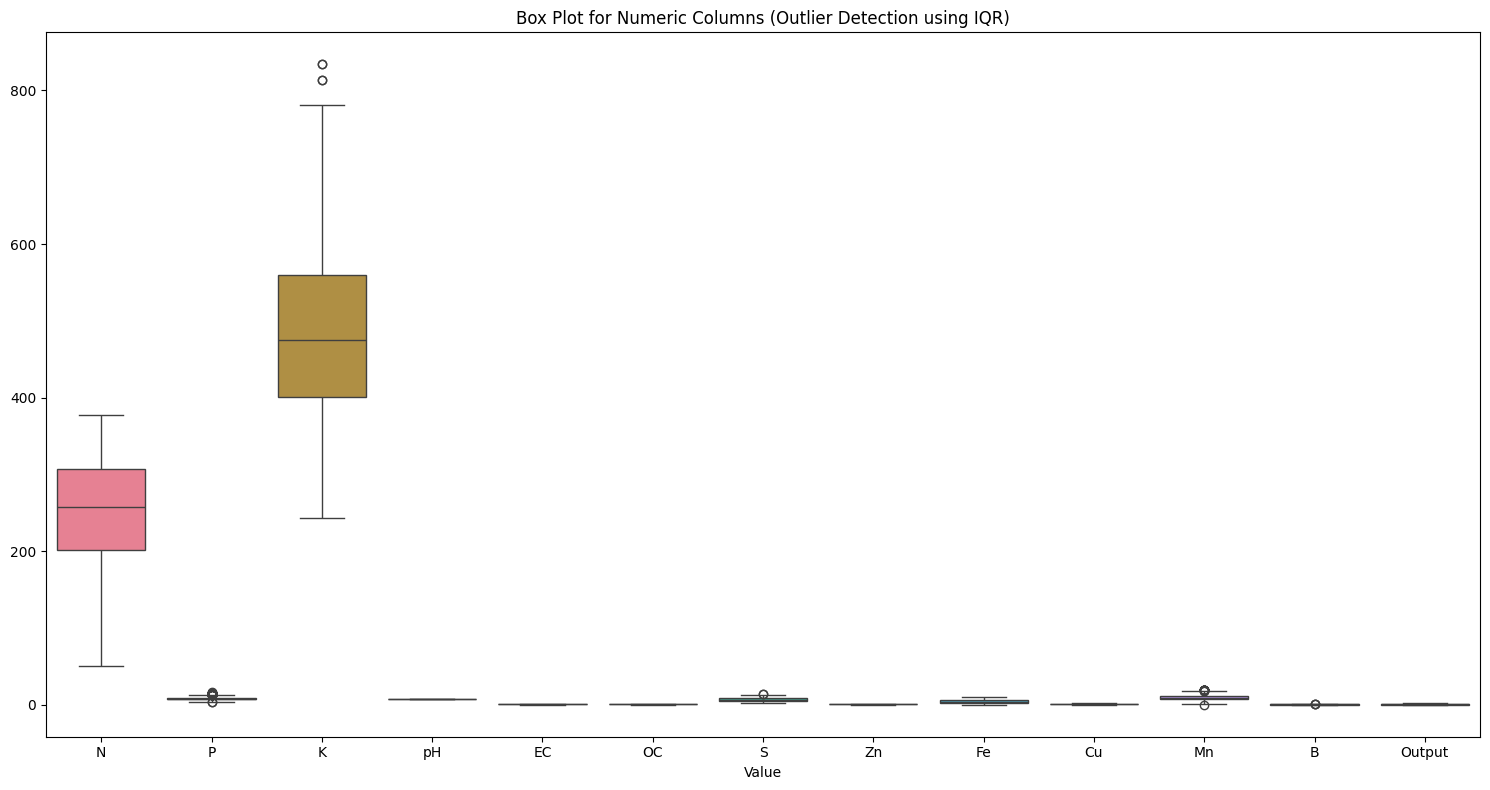

In [35]:

plt.figure(figsize=(15, 8))
sns.boxplot(data=df1, orient='v')  # Use 'v' for vertical if you prefer
# Title and labels
plt.title("Box Plot for Numeric Columns (Outlier Detection using IQR)")
plt.xlabel("Value")

plt.tight_layout()
plt.show()


In [36]:

numeric_df = df2.select_dtypes(include='number')
# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df4= df2[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

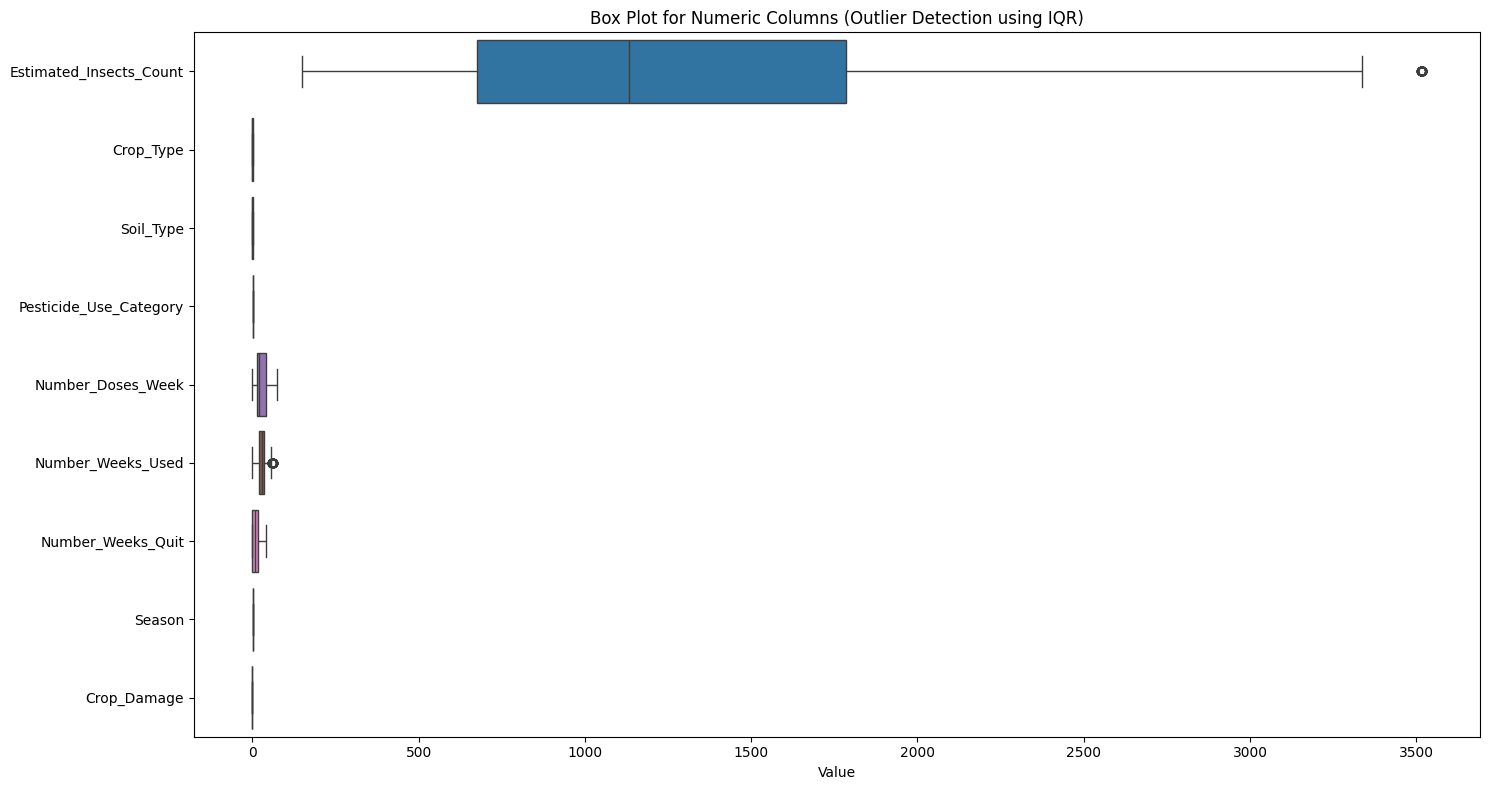

In [37]:

plt.figure(figsize=(15, 8))
sns.boxplot(data=df4, orient='h')  # Use 'v' for vertical if you prefer
# Title and labels
plt.title("Box Plot for Numeric Columns (Outlier Detection using IQR)")
plt.xlabel("Value")

plt.tight_layout()
plt.show()


In [38]:

numeric_df = df3.select_dtypes(include='number')
# Calculate Q1, Q3, and IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df3 = df3[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]


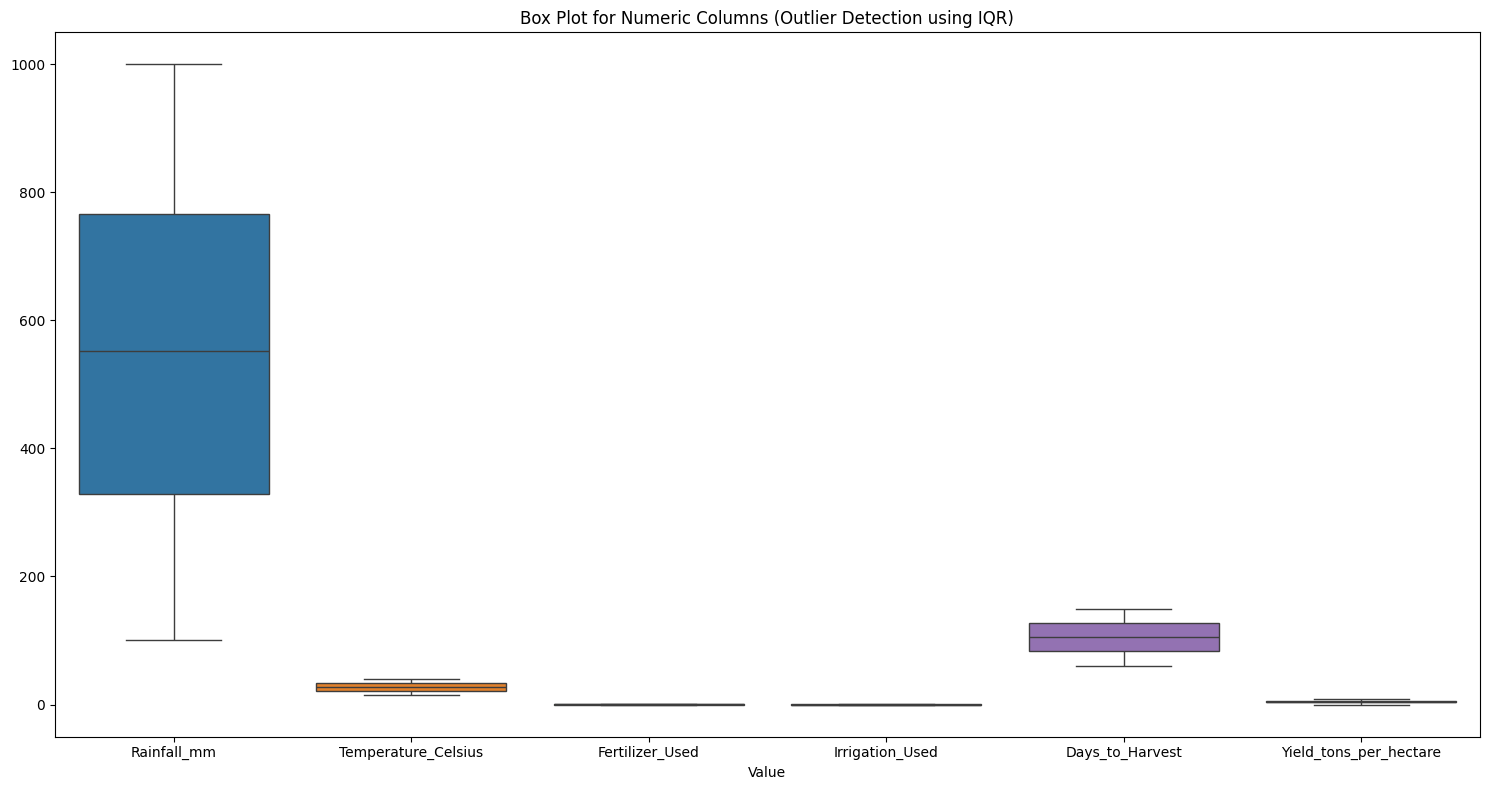

In [39]:

plt.figure(figsize=(15, 8))
sns.boxplot(data=df3, orient='v')  # Use 'v' for vertical if you prefer
# Title and labels
plt.title("Box Plot for Numeric Columns (Outlier Detection using IQR)")
plt.xlabel("Value")

plt.tight_layout()
plt.show()


<a id="import"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Label Encoding </span></b></h2>

In [40]:
# One Label Encoding on Df3 
cat_columns = ['Region', 'Soil_Type', 'Crop','Fertilizer_Used','Irrigation_Used','Weather_Condition']  
le = LabelEncoder()
for col in cat_columns:
    df3[col] = le.fit_transform(df3[col].astype(str))  # convert to string in case of NaNs or mixed types

In [41]:
df3.head ()

Region  Soil_Type  Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
0       3          4     1   897.077239            27.676966                0   
1       2          1     3   992.673282            18.026142                1   
2       1          2     0   147.998025            29.794042                0   
3       1          4     4   986.866331            16.644190                0   
4       2          5     5   730.379174            31.620687                1   

   Irrigation_Used  Weather_Condition  Days_to_Harvest  Yield_tons_per_hectare  
0                1                  0              122                6.555816  
1                1                  1              140                8.527341  
2                0                  2              106                1.127443  
3                1                  1              146                6.517573  
4                1                  0              110                7.248251

<a id="import"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">plots-1 </span></b></h2>

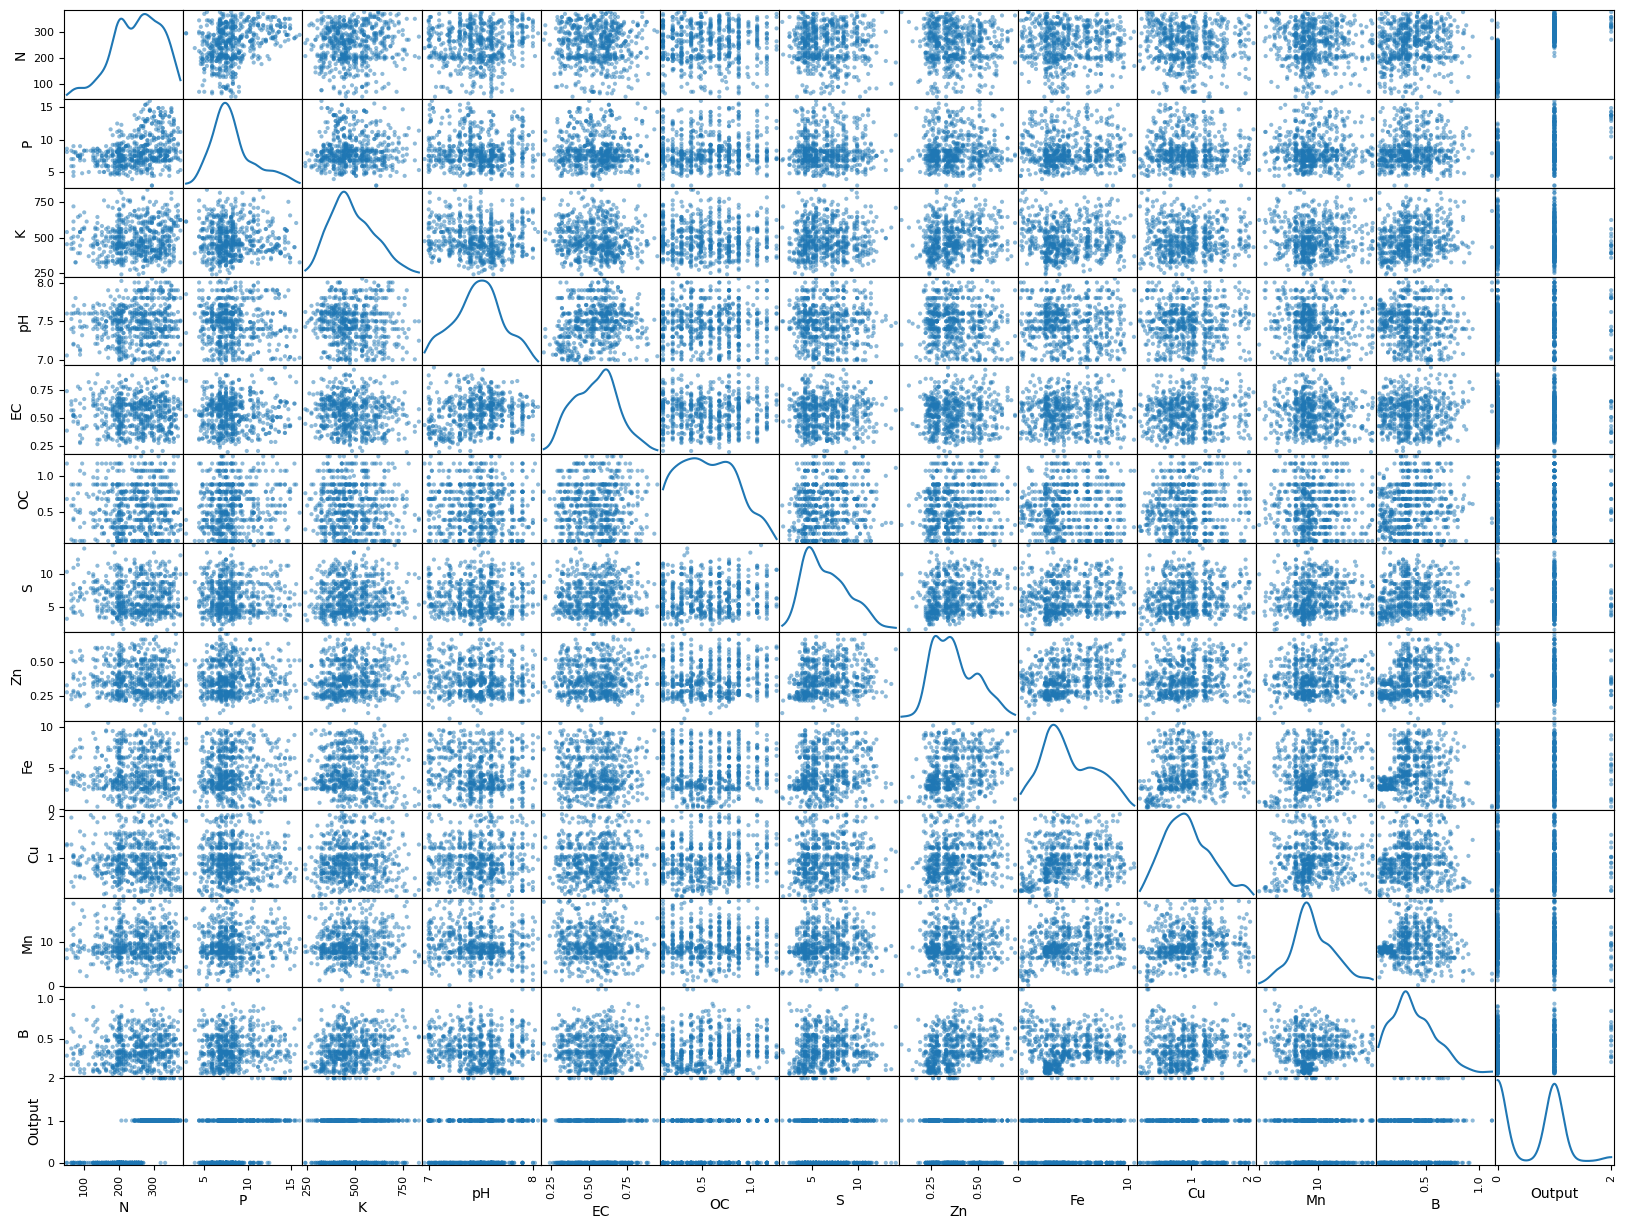

In [42]:

from pandas.plotting import scatter_matrix
scatter_matrix(df1, figsize=(20, 15), diagonal='kde')
plt.show()

<a id="import"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Heatmap-1 </span></b></h2>

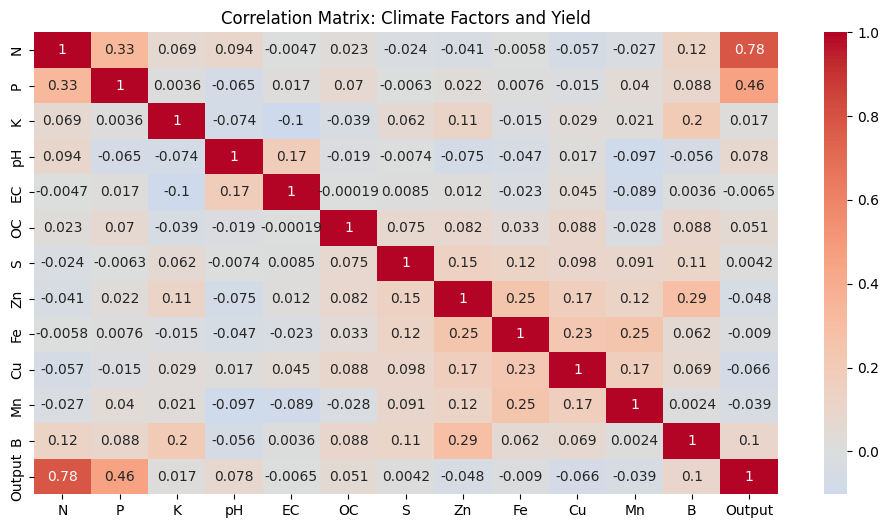

In [44]:


# Correlation heatmap
plt.figure(figsize=(12, 6))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Climate Factors and Yield')
plt.show()



<a id="import"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">plots-2 </span></b></h2>

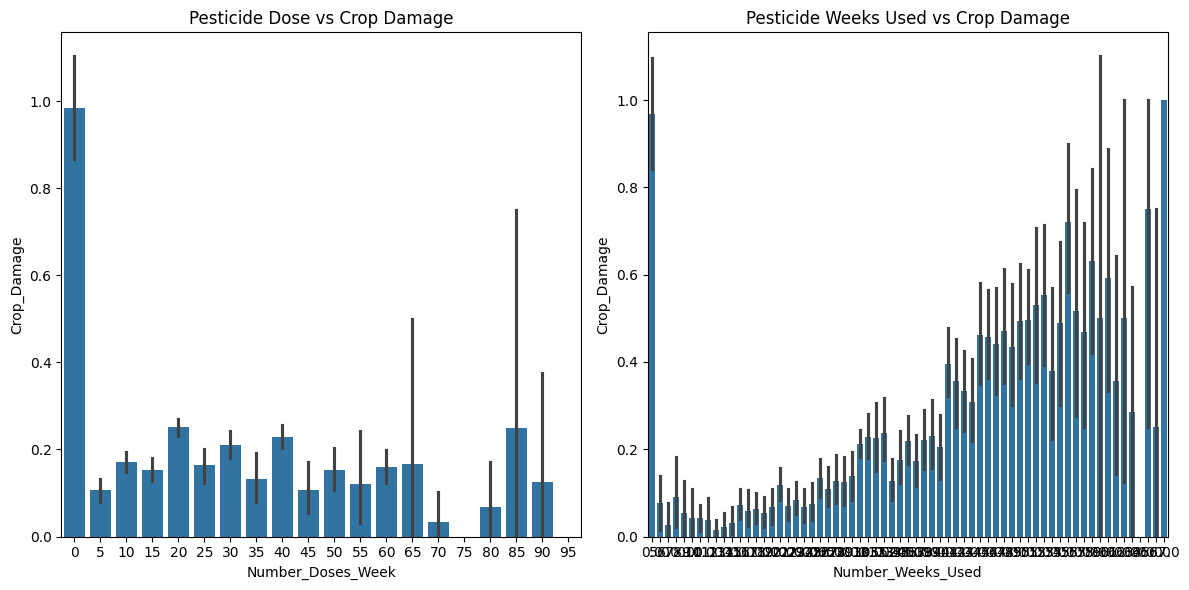

In [46]:

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First barplot
sns.barplot(x='Number_Doses_Week', y='Crop_Damage', data=df2, ax=axes[0])
axes[0].set_title('Pesticide Dose vs Crop Damage')

# Second barplot
sns.barplot(x='Number_Weeks_Used', y='Crop_Damage', data=df2, ax=axes[1])
axes[1].set_title('Pesticide Weeks Used vs Crop Damage')

# Show the whole figure
plt.tight_layout()
plt.show()


<a id="import"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Heatmap-2</span></b></h2>

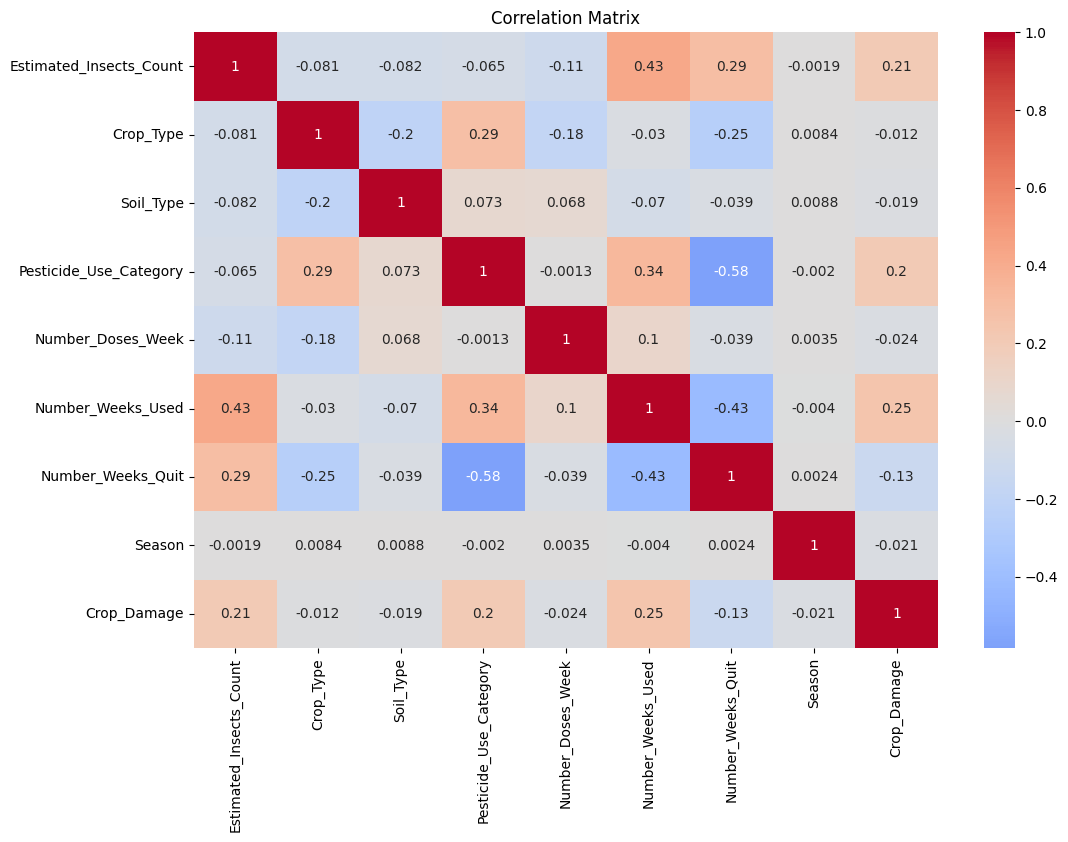

In [47]:

plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

<a id="import"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">plots-3 </span></b></h2>

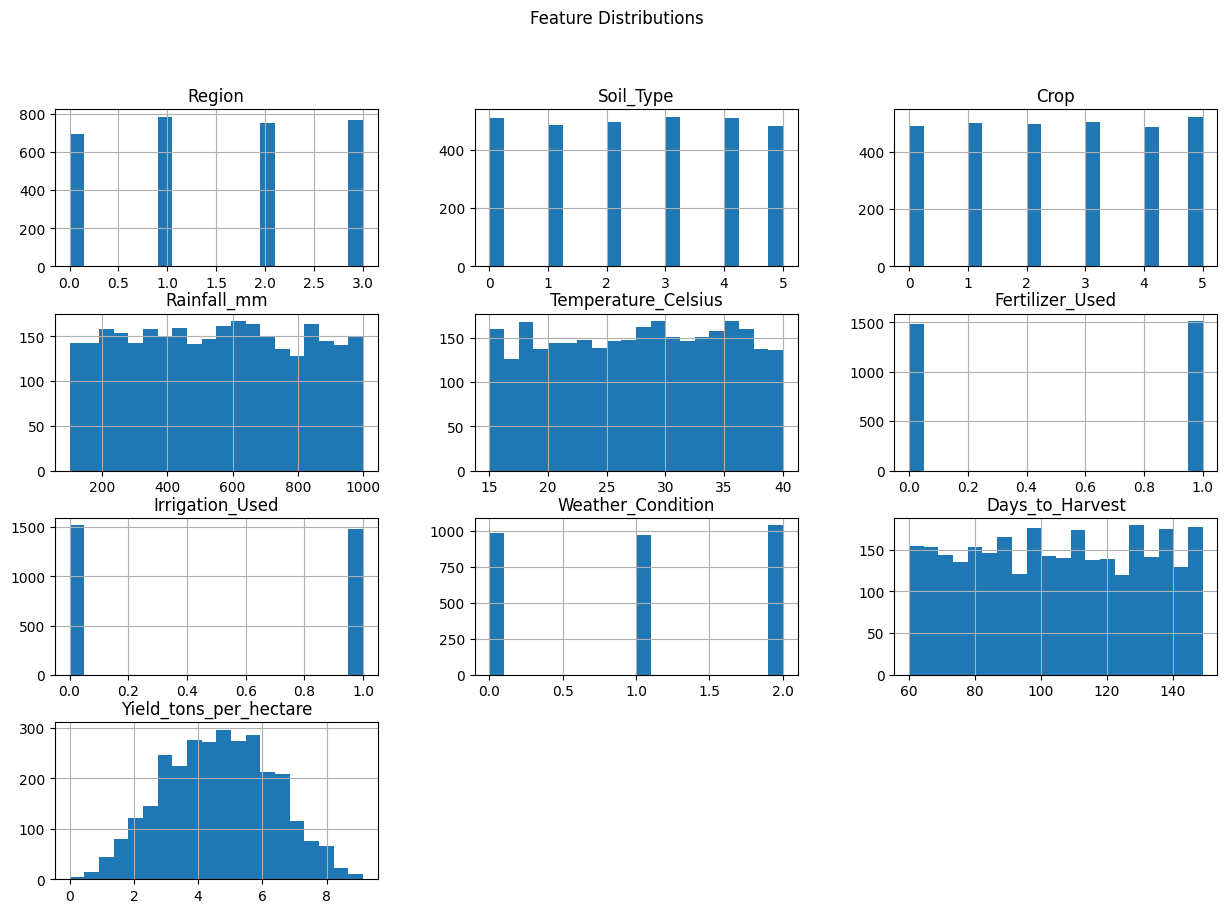

In [51]:
df3[['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius','Fertilizer_Used','Irrigation_Used','Weather_Condition','Days_to_Harvest','Yield_tons_per_hectare']].hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

<a id="import"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Heatmap-3 </span></b></h2>

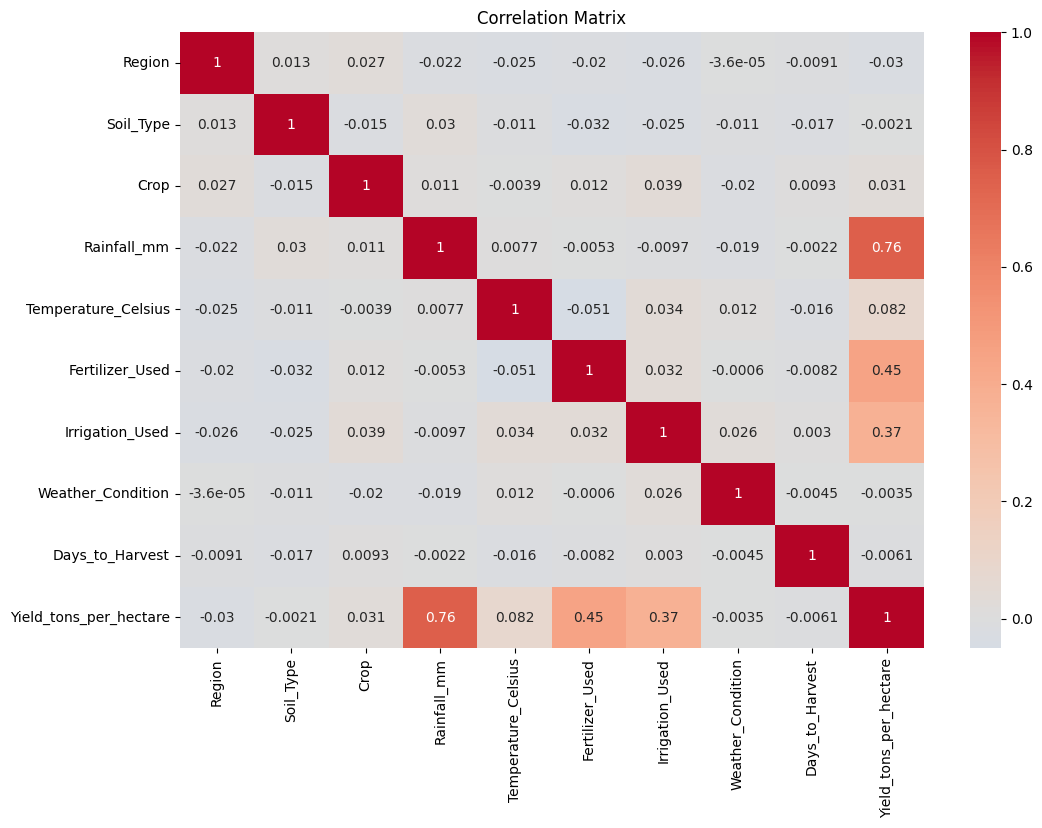

In [50]:

plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

<a id="missing"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Model Selection & Model Training </span></b></h2>

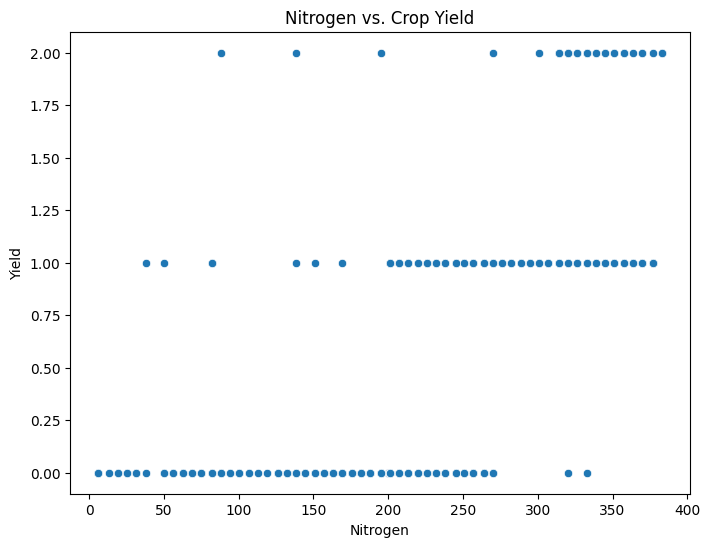


Decision Tree Feature Importance:
N     0.733182
P     0.174335
pH    0.061995
K     0.030488
dtype: float64

Random Forest Feature Importance:
N     0.749444
P     0.148011
pH    0.052462
K     0.050083
dtype: float64

XGBoost Feature Importance:
N     0.711533
P     0.182020
pH    0.059636
K     0.046810
dtype: float32

Model Performance Comparison:
               Model      RMSE        R2
8                ANN  0.322700  0.703085
5      Random Forest  0.326915  0.695277
6                KNN  0.353232  0.644242
3                SVM  0.353254  0.644197
7            XGBoost  0.375245  0.598519
4      Decision Tree  0.386196  0.574742
0  Linear Regression  0.403673  0.535383
1   Ridge Regression  0.403731  0.535250
2   Lasso Regression  0.593043 -0.002784


C:\Users\shiva\AppData\Local\Temp\ipykernel_22624\1981927428.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')


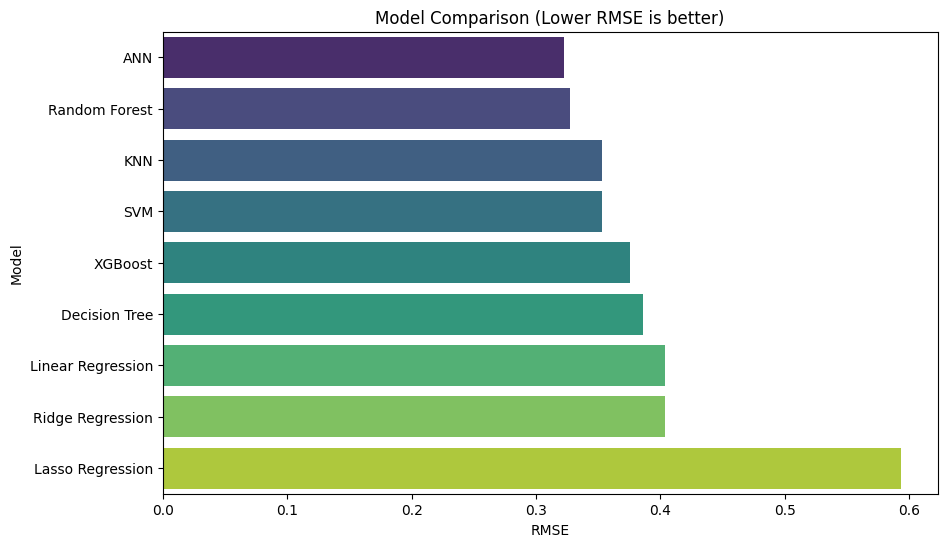


Best Model: ANN


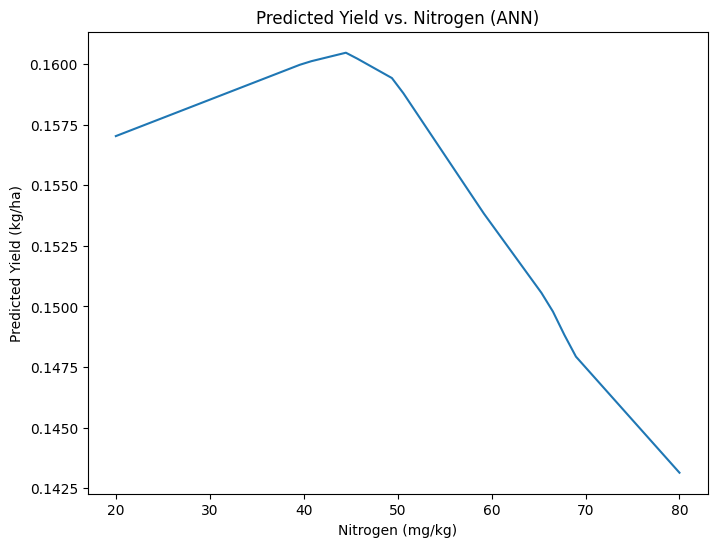


Recommendation: Maintain Nitrogen around 44.5 mg/kg for high yield.


In [ ]:

# Visualize: Nitrogen vs. Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='N', y='Output', data=df1)
plt.title('Nitrogen vs. Crop Yield')
plt.xlabel('Nitrogen')
plt.ylabel('Yield')
plt.show()

# Prepare data
X = df1[['N', 'P', 'K', 'pH']]
y = df1['Output']

# Split data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Ridge Regression': make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
    'Lasso Regression': make_pipeline(StandardScaler(), Lasso(alpha=1.0)),
    'SVM': make_pipeline(StandardScaler(), SVR()),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': make_pipeline(StandardScaler(), KNeighborsRegressor()),
    'XGBoost': XGBRegressor(random_state=42),
    'ANN': make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 50), 
                                                     max_iter=1000, random_state=42))
}

# Train, predict and evaluate models
results = []
for name, model in models.items():
    # Train model
    model.fit(X_train1, y_train1)
    
    # Predict
    y_pred = model.predict(X_test1)
    
    # Evaluate
    mse = mean_squared_error(y_test1, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test1, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'MSE': mse,
        'R2': r2
    })
    
    # Print feature importance if available
    if hasattr(model, 'feature_importances_'):
        if hasattr(model, 'named_steps'):  # For pipeline objects
            importance = model.named_steps[list(model.named_steps.keys())[-1]].feature_importances_
        else:
            importance = model.feature_importances_
        print(f"\n{name} Feature Importance:")
        print(pd.Series(importance, index=X.columns).sort_values(ascending=False))
    elif hasattr(model, 'coef_'):
        if hasattr(model, 'named_steps'):  # For pipeline objects
            coef = model.named_steps[list(model.named_steps.keys())[-1]].coef_
        else:
            coef = model.coef_
        print(f"\n{name} Coefficients:")
        print(pd.Series(coef, index=X.columns).sort_values(ascending=False))

# Display results
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\nModel Performance Comparison:")
print(results_df[['Model', 'RMSE', 'R2']])

# Plot model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison (Lower RMSE is better)')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

# For the best model - generate recommendations
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Generate nitrogen recommendation plot
nitrogen_range = np.linspace(20, 80, 50)
yields = []

for n in nitrogen_range:
    sample = X_test1.iloc[0:1].copy()
    sample['N'] = n
    yields.append(best_model.predict(sample)[0])

plt.figure(figsize=(8, 6))
plt.plot(nitrogen_range, yields)
plt.title(f'Predicted Yield vs. Nitrogen ({best_model_name})')
plt.xlabel('Nitrogen (mg/kg)')
plt.ylabel('Predicted Yield (kg/ha)')
plt.show()

optimal_nitrogen = nitrogen_range[np.argmax(yields)]
print(f"\nRecommendation: Maintain Nitrogen around {optimal_nitrogen:.1f} mg/kg for high yield.")

<a id="load_data"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">results of dataset 1</span></b></h1>

c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


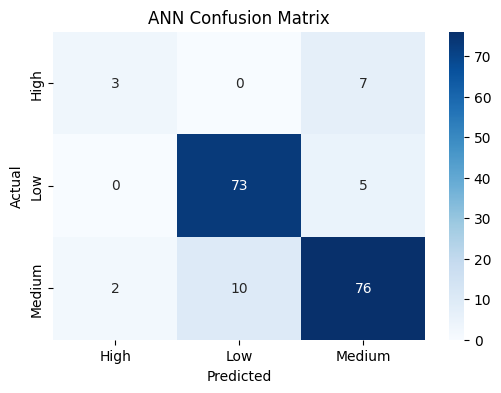

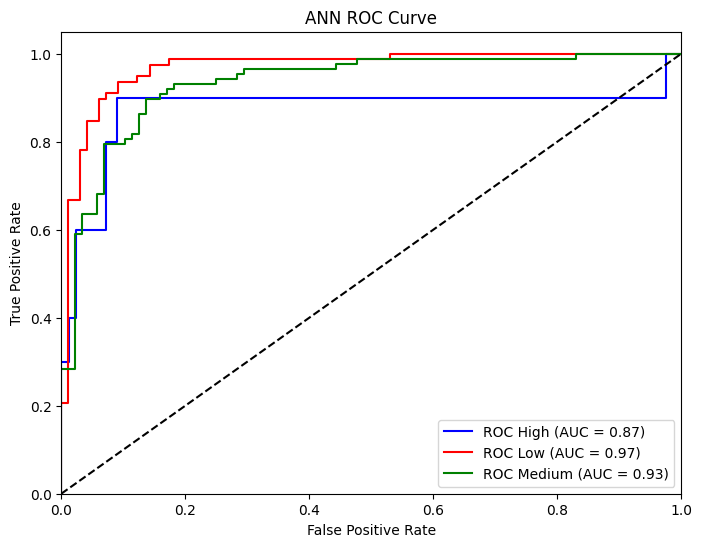

ANN Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.30      0.40        10
         Low       0.88      0.94      0.91        78
      Medium       0.86      0.86      0.86        88

    accuracy                           0.86       176
   macro avg       0.78      0.70      0.72       176
weighted avg       0.86      0.86      0.86       176


ANN Accuracy: 0.8636


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_curve, auc, accuracy_score)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert continuous output to classes and encode as integers
y_class = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])

# Convert string labels to numerical values
le = LabelEncoder()
y_class_numeric = le.fit_transform(y_class)

# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_class_numeric, test_size=0.2, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

# One-hot encode target
y_train_cat = to_categorical(y_train_clf)
y_test_cat = to_categorical(y_test_clf)

# Build ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_clf.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_clf_scaled, y_train_cat, epochs=50, batch_size=16, verbose=0, validation_split=0.1)

# Predict
y_prob = model.predict(X_test_clf_scaled)
y_pred = np.argmax(y_prob, axis=1)

# Convert numerical predictions back to original labels for reporting
y_test_labels = le.inverse_transform(y_test_clf)
y_pred_labels = le.inverse_transform(y_pred)

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve (for multiclass)
y_test_bin = label_binarize(y_test_clf, classes=np.unique(y_test_clf))
n_classes = y_test_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'ROC {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("ANN Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Accuracy
accuracy = accuracy_score(y_test_clf, y_pred)
print(f"\nANN Accuracy: {accuracy:.4f}")


Shape before cleaning:
X shape: (8934, 8)
y shape: (8934,)

Shape after cleaning:
X shape: (8934, 8)
y shape: (8934,)


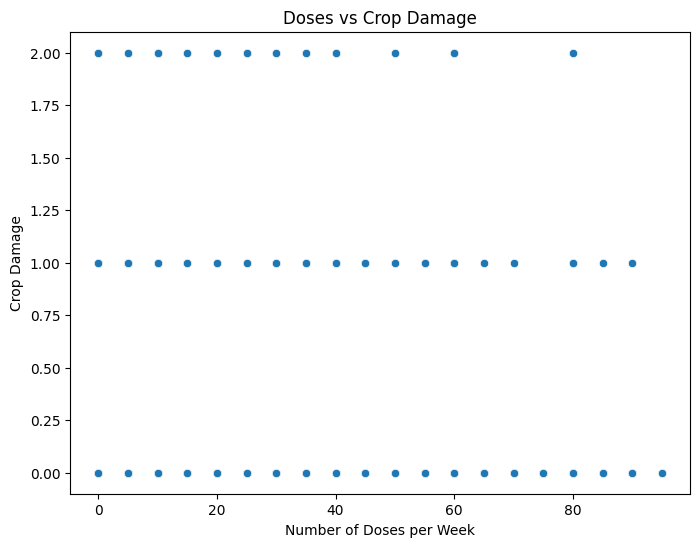


Decision Tree Feature Importance:
Estimated_Insects_Count    0.281545
Number_Weeks_Used          0.242830
Number_Weeks_Quit          0.160363
Number_Doses_Week          0.148102
Season                     0.085392
Soil_Type                  0.043436
Crop_Type                  0.024080
Pesticide_Use_Category     0.014253
dtype: float64

Random Forest Feature Importance:
Estimated_Insects_Count    0.270188
Number_Weeks_Used          0.264339
Number_Doses_Week          0.154397
Number_Weeks_Quit          0.119702
Season                     0.072630
Soil_Type                  0.045322
Pesticide_Use_Category     0.044262
Crop_Type                  0.029160
dtype: float64

XGBoost Feature Importance:
Pesticide_Use_Category     0.316402
Number_Weeks_Quit          0.135321
Number_Weeks_Used          0.106890
Crop_Type                  0.103673
Number_Doses_Week          0.102940
Estimated_Insects_Count    0.081287
Season                     0.077942
Soil_Type                  0.075546
dtype: 

C:\Users\shiva\AppData\Local\Temp\ipykernel_22624\3511478662.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')


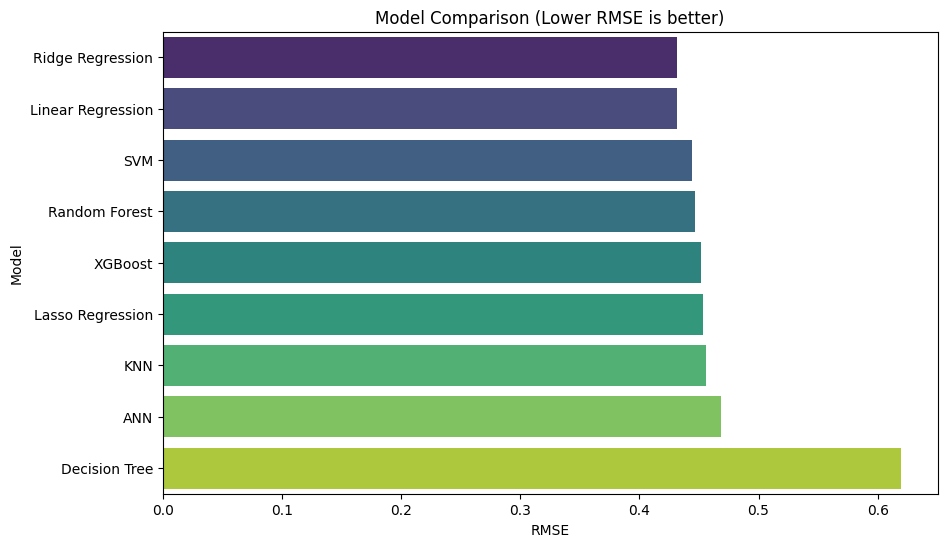


Best Model: Ridge Regression


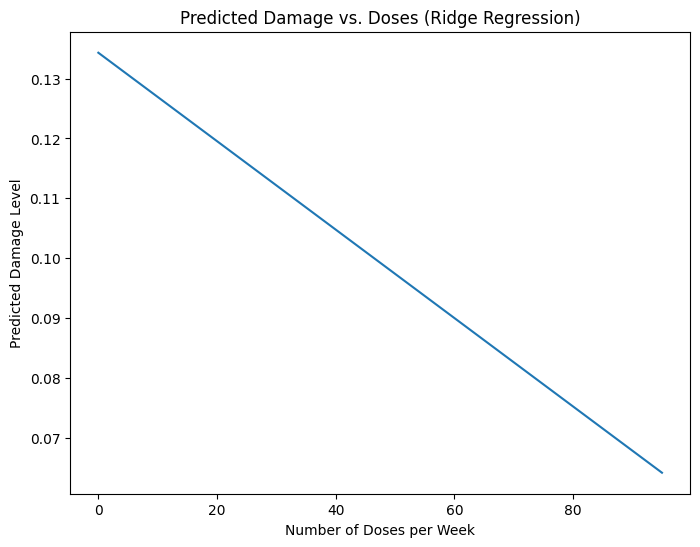


Recommendation: Maintain 95.0 doses per week to minimize crop damage.


In [ ]:


# First check for missing values and alignment
print("Shape before cleaning:")
print("X shape:", df2[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 
                      'Pesticide_Use_Category', 'Number_Doses_Week',
                      'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season']].shape)
print("y shape:", df2['Crop_Damage'].shape)

# Drop rows with missing values
columns_to_check = ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
                   'Pesticide_Use_Category', 'Number_Doses_Week',
                   'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season',
                   'Crop_Damage']
df2_clean = df2.dropna(subset=columns_to_check)

print("\nShape after cleaning:")
print("X shape:", df2_clean[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
                            'Pesticide_Use_Category', 'Number_Doses_Week',
                            'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season']].shape)
print("y shape:", df2_clean['Crop_Damage'].shape)

# Visualize: Doses vs Crop Damage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number_Doses_Week', y='Crop_Damage', data=df2_clean)
plt.title('Doses vs Crop Damage')
plt.xlabel('Number of Doses per Week')
plt.ylabel('Crop Damage')
plt.show()

# Prepare data
X = df2_clean[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
               'Pesticide_Use_Category', 'Number_Doses_Week',
               'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season']]
y = df2_clean['Crop_Damage']

# Verify shapes match
assert X.shape[0] == y.shape[0], "X and y must have same number of samples!"

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Ridge Regression': make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
    'Lasso Regression': make_pipeline(StandardScaler(), Lasso(alpha=1.0)),
    'SVM': make_pipeline(StandardScaler(), SVR()),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': make_pipeline(StandardScaler(), KNeighborsRegressor()),
    'XGBoost': XGBRegressor(random_state=42),
    'ANN': make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 50), 
                                                     max_iter=1000, random_state=42))
}

# Train, predict and evaluate models
results = []
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'MSE': mse,
        'R2': r2
    })
    
    # Create residual plot instead of confusion matrix for regression
 
    
    # Print feature importance if available
    if hasattr(model, 'feature_importances_'):
        if hasattr(model, 'named_steps'):
            importance = model.named_steps[list(model.named_steps.keys())[-1]].feature_importances_
        else:
            importance = model.feature_importances_
        print(f"\n{name} Feature Importance:")
        print(pd.Series(importance, index=X.columns).sort_values(ascending=False))
    elif hasattr(model, 'coef_'):
        if hasattr(model, 'named_steps'):
            coef = model.named_steps[list(model.named_steps.keys())[-1]].coef_
        else:
            coef = model.coef_
        print(f"\n{name} Coefficients:")
        print(pd.Series(coef, index=X.columns).sort_values(ascending=False))

# Display results
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\nModel Performance Comparison:")
print(results_df[['Model', 'RMSE', 'R2']])

# Plot model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison (Lower RMSE is better)')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

# For the best model - generate recommendations
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Generate dose recommendation plot
dose_range = np.linspace(X['Number_Doses_Week'].min(), 
                         X['Number_Doses_Week'].max(), 50)
damage_levels = []

for dose in dose_range:
    sample = X_test.iloc[0:1].copy()
    sample['Number_Doses_Week'] = dose
    damage_levels.append(best_model.predict(sample)[0])

plt.figure(figsize=(8, 6))
plt.plot(dose_range, damage_levels)
plt.title(f'Predicted Damage vs. Doses ({best_model_name})')
plt.xlabel('Number of Doses per Week')
plt.ylabel('Predicted Damage Level')
plt.show()



optimal_dose = dose_range[np.argmin(damage_levels)]
print(f"\nRecommendation: Maintain {optimal_dose:.1f} doses per week to minimize crop damage.")

<a id="load_data"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">results of dataset 2</span></b></h1>

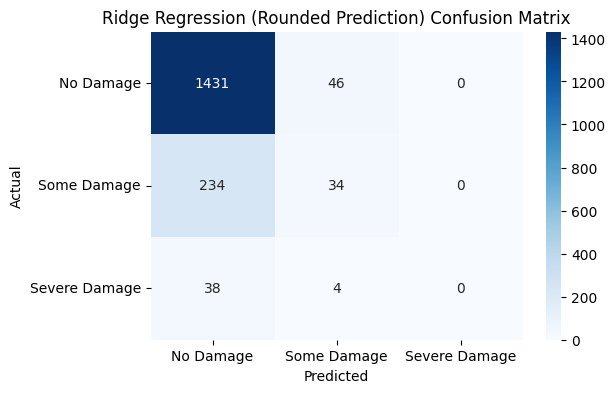


Ridge Regression Classification Report:
               precision    recall  f1-score   support

    No Damage       0.84      0.97      0.90      1477
  Some Damage       0.40      0.13      0.19       268
Severe Damage       0.00      0.00      0.00        42

     accuracy                           0.82      1787
    macro avg       0.42      0.37      0.36      1787
 weighted avg       0.76      0.82      0.77      1787



c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

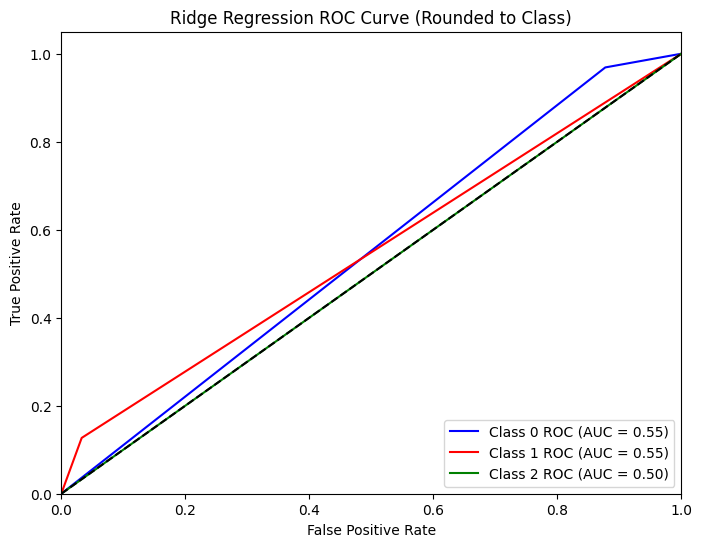

In [ ]:


# 1. Predict using Ridge Regression
ridge_model = models['Ridge Regression']
y_pred_continuous = ridge_model.predict(X_test)

# 2. Round predictions to nearest class label (0, 1, 2)
y_pred_class = np.round(y_pred_continuous).astype(int)

# Clip predictions to stay within valid range (0, 1, 2)
y_pred_class = np.clip(y_pred_class, y_test.min(), y_test.max())

# 3. Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_class, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Damage', 'Some Damage', 'Severe Damage'],
            yticklabels=['No Damage', 'Some Damage', 'Severe Damage'])
plt.title('Ridge Regression (Rounded Prediction) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Classification Report
print("\nRidge Regression Classification Report:")
print(classification_report(y_test, y_pred_class, target_names=['No Damage', 'Some Damage', 'Severe Damage']))

# 5. ROC Curve
# Binarize the output for ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred_class, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {i} ROC (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ridge Regression ROC Curve (Rounded to Class)')
plt.legend(loc="lower right")
plt.show()



Shape before cleaning:
X shape: (2999, 9)
y shape: (2999,)

Shape after cleaning:
X shape: (2999, 9)
y shape: (2999,)


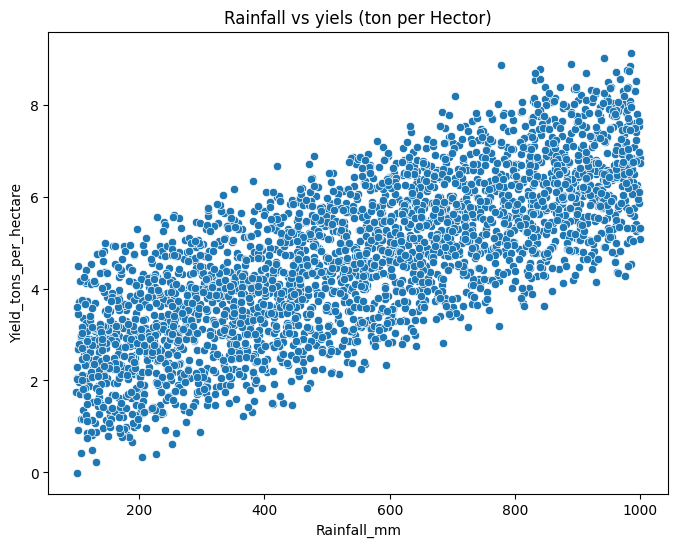


Decision Tree Feature Importance:
Rainfall_mm            0.599821
Fertilizer_Used        0.210657
Irrigation_Used        0.121334
Temperature_Celsius    0.023752
Days_to_Harvest        0.017255
Soil_Type              0.008848
Crop                   0.008341
Region                 0.005103
Weather_Condition      0.004889
dtype: float64

Random Forest Feature Importance:
Rainfall_mm            0.602571
Fertilizer_Used        0.207690
Irrigation_Used        0.121276
Temperature_Celsius    0.026883
Days_to_Harvest        0.016857
Soil_Type              0.007296
Crop                   0.007170
Region                 0.005809
Weather_Condition      0.004448
dtype: float64

XGBoost Feature Importance:
Fertilizer_Used        0.593144
Irrigation_Used        0.242183
Rainfall_mm            0.141330
Temperature_Celsius    0.006178
Days_to_Harvest        0.004809
Weather_Condition      0.003748
Crop                   0.002950
Soil_Type              0.002856
Region                 0.002802
dtype: 

C:\Users\shiva\AppData\Local\Temp\ipykernel_22624\3990092989.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')


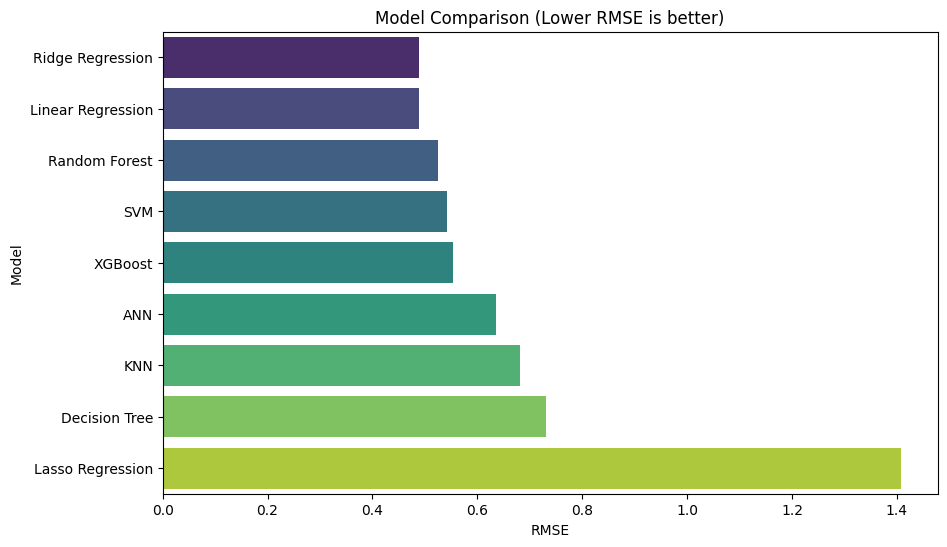


Best Model: Ridge Regression


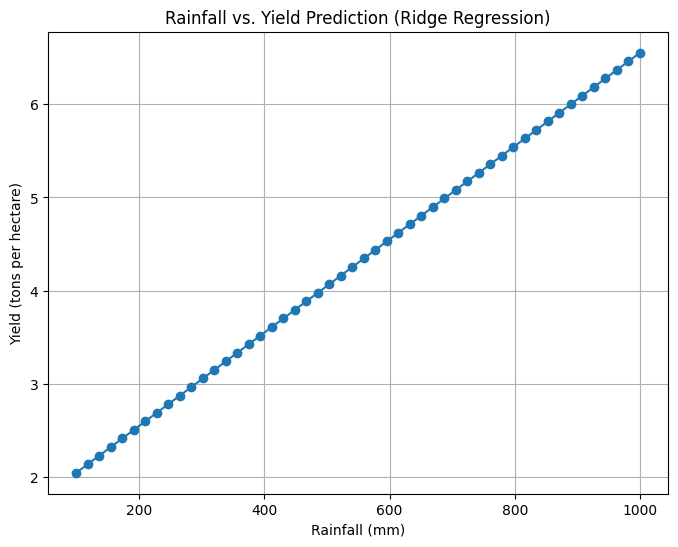


Recommendation: Maintain approximately 999.6 mm rainfall to maximize crop yield.


In [ ]:


# First check for missing values and alignment
print("Shape before cleaning:")
print("X shape:", df3[[	'Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius','Fertilizer_Used','Irrigation_Used','Weather_Condition','Days_to_Harvest']].shape)
print("y shape:", df3['Yield_tons_per_hectare'].shape)

# Drop rows with missing values
columns_to_check = ['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius','Fertilizer_Used','Irrigation_Used','Weather_Condition','Days_to_Harvest','Yield_tons_per_hectare']
df3_clean = df3.dropna(subset=columns_to_check)

print("\nShape after cleaning:")
print("X shape:", df3_clean[['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius','Fertilizer_Used','Irrigation_Used','Weather_Condition','Days_to_Harvest']].shape)
print("y shape:", df3_clean['Yield_tons_per_hectare'].shape)

# Visualize: Doses vs Crop Damage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=df3_clean)
plt.title('Rainfall vs yiels (ton per Hector)')
plt.xlabel('Rainfall_mm')
plt.ylabel('Yield_tons_per_hectare')
plt.show()

# Prepare data
X = df3_clean[['Region','Soil_Type','Crop','Rainfall_mm','Temperature_Celsius','Fertilizer_Used','Irrigation_Used','Weather_Condition','Days_to_Harvest']]
y = df3_clean['Yield_tons_per_hectare']

# Verify shapes match
assert X.shape[0] == y.shape[0], "X and y must have same number of samples!"

# Split data
X_train3, X_test3, y_train3, y_test3= train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Ridge Regression': make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
    'Lasso Regression': make_pipeline(StandardScaler(), Lasso(alpha=1.0)),
    'SVM': make_pipeline(StandardScaler(), SVR()),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': make_pipeline(StandardScaler(), KNeighborsRegressor()),
    'XGBoost': XGBRegressor(random_state=42),
    'ANN': make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 50), 
                                                     max_iter=1000, random_state=42))
}

# Train, predict and evaluate models
results = []
for name, model in models.items():
    # Train model
    model.fit(X_train3, y_train3)
    
    # Predict
    y_pred = model.predict(X_test3)
    
    # Evaluate
    mse = mean_squared_error(y_test3, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test3, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'MSE': mse,
        'R2': r2
    })
    
    # Create residual plot instead of confusion matrix for regression
 
    
    # Print feature importance if available
    if hasattr(model, 'feature_importances_'):
        if hasattr(model, 'named_steps'):
            importance = model.named_steps[list(model.named_steps.keys())[-1]].feature_importances_
        else:
            importance = model.feature_importances_
        print(f"\n{name} Feature Importance:")
        print(pd.Series(importance, index=X.columns).sort_values(ascending=False))
    elif hasattr(model, 'coef_'):
        if hasattr(model, 'named_steps'):
            coef = model.named_steps[list(model.named_steps.keys())[-1]].coef_
        else:
            coef = model.coef_
        print(f"\n{name} Coefficients:")
        print(pd.Series(coef, index=X.columns).sort_values(ascending=False))

# Display results
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\nModel Performance Comparison:")
print(results_df[['Model', 'RMSE', 'R2']])

# Plot model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison (Lower RMSE is better)')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

# For the best model - generate recommendations
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Generate rainfall recommendation plot
weather_condition = np.linspace(X['Rainfall_mm'].min(), 
                                X['Rainfall_mm'].max(), 50)
yield_levels = []

# Use a base sample from test set with correct columns
base_sample = X_test3.iloc[0:1].copy()

for weather in weather_condition:
    sample = base_sample.copy()
    sample['Rainfall_mm'] = weather
    yield_levels.append(best_model.predict(sample)[0])

# Plot Rainfall vs Yield
plt.figure(figsize=(8, 6))
plt.plot(weather_condition, yield_levels, marker='o')
plt.title(f'Rainfall vs. Yield Prediction ({best_model_name})')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (tons per hectare)')
plt.grid(True)
plt.show()

# Find optimal rainfall value (maximum yield)
optimal_weather = weather_condition[np.argmax(yield_levels)]
print(f"\nRecommendation: Maintain approximately {optimal_weather:.1f} mm rainfall to maximize crop yield.")


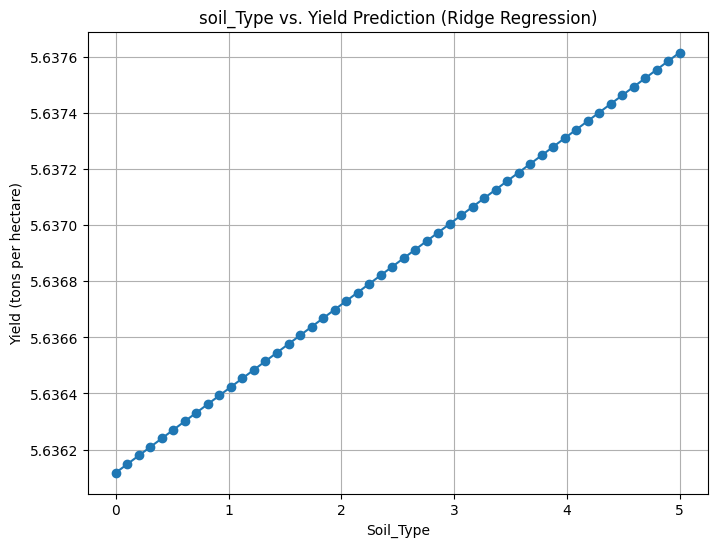


Recommendation: Maintain approximately 5.0  maximize crop yield.
Soil type corresponding to encoded value 5 is: Silt


In [ ]:
# Generate rainfall recommendation plot
weather_condition = np.linspace(X['Soil_Type'].min(), 
                                X['Soil_Type'].max(), 50)
yield_levels = []

# Use a base sample from test set with correct columns
base_sample = X_test3.iloc[0:1].copy()

for weather in weather_condition:
    sample = base_sample.copy()
    sample['Soil_Type'] = weather
    yield_levels.append(best_model.predict(sample)[0])

# Plot Rainfall vs Yield
plt.figure(figsize=(8, 6))
plt.plot(weather_condition, yield_levels, marker='o')
plt.title(f'soil_Type vs. Yield Prediction ({best_model_name})')
plt.xlabel('Soil_Type')
plt.ylabel('Yield (tons per hectare)')
plt.grid(True)
plt.show()

# Find optimal rainfall value (maximum yield)
optimal_weather = weather_condition[np.argmax(yield_levels)]
print(f"\nRecommendation: Maintain approximately {optimal_weather:.1f}  maximize crop yield.")
print ('Soil type corresponding to encoded value 5 is: Silt')

<a id="load_data"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Results of Dataset 3</span></b></h1>

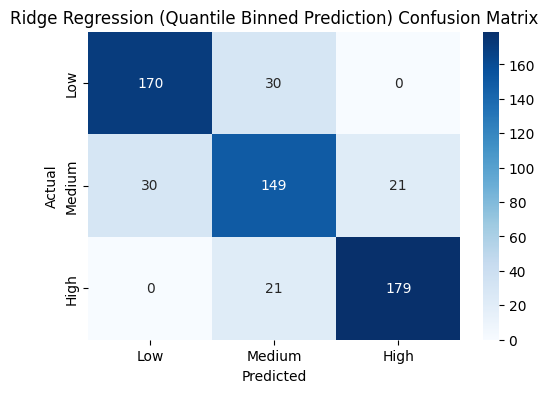


Ridge Regression Classification Report:
              precision    recall  f1-score   support

         Low       0.85      0.85      0.85       200
      Medium       0.74      0.74      0.74       200
        High       0.90      0.90      0.90       200

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



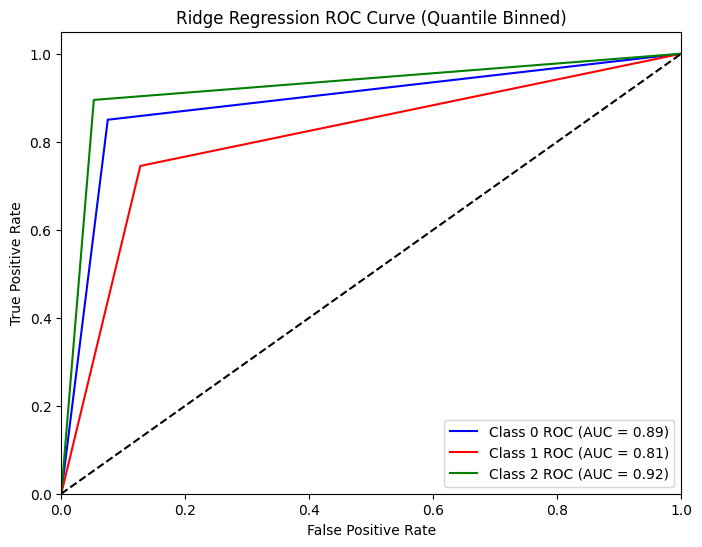

In [ ]:


# 1. Predict using Ridge Regression
ridge_model = models['Ridge Regression']
y_pred_continuous = ridge_model.predict(X_test3)

# 2. Convert y_test3 and y_pred to categorical class labels using quantile-based binning
n_bins = 3
y_test_class = pd.qcut(y_test3, q=n_bins, labels=False)
y_pred_class = pd.qcut(y_pred_continuous, q=n_bins, labels=False)

# 3. Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test_class, y_pred_class, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Ridge Regression (Quantile Binned Prediction) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Classification Report
print("\nRidge Regression Classification Report:")
print(classification_report(y_test_class, y_pred_class, target_names=['Low', 'Medium', 'High']))

# 5. ROC Curve
# Binarize the output for ROC
y_test_bin = label_binarize(y_test_class, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred_class, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {i} ROC (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ridge Regression ROC Curve (Quantile Binned)')
plt.legend(loc="lower right")
plt.show()


<a id="load_data"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Testing On New Data (df1)</span></b></h2>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming df1 is your main dataframe
# Select features and target
X = df1[['N', 'P', 'K', 'pH']]
y = df1['Output']

# Convert continuous output to classes (Low, Medium, High)
y_class = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])

# Encode the classes
le = LabelEncoder()
y_encoded = le.fit_transform(y_class)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the target
y_train_cat = np.eye(3)[y_train]  # 3 classes
y_test_cat = np.eye(3)[y_test]

# Create the ANN model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model on actual data
history = model.fit(X_train_scaled, 
                    y_train_cat, 
                    epochs=50, 
                    batch_size=16, 
                    validation_data=(X_test_scaled, y_test_cat),
                    verbose=1)

# Now prepare your sample data for prediction
sample_data = {
    'N': 30, 'P': 6.8, 'K': 47, 'pH': 7.64,
    'EC': 0.58, 'OC': 0.94, 'S': 26.0,
    'Zn': 0.34, 'Fe': 0.54, 'Cu': 1.53,
    'Mn': 2.65, 'B': 1.82
}

# Convert to DataFrame and select features
sample_df = pd.DataFrame([sample_data])
X_sample = sample_df[['N', 'P', 'K', 'pH']]

# Scale the sample data using the same scaler
X_sample_scaled = scaler.transform(X_sample)

# Make prediction
y_prob = model.predict(X_sample_scaled)
y_pred = np.argmax(y_prob, axis=1)

# Decode the prediction
predicted_class = le.inverse_transform(y_pred)[0]
class_probabilities = {
    'Low': float(y_prob[0][0]),
    'Medium': float(y_prob[0][1]),
    'High': float(y_prob[0][2])
}

# Print results
print(f"\nInput Features:\n{X_sample}\n")
print("Prediction Results:")
print(f"Predicted Yield Class: {predicted_class}")
print("Class Probabilities:")
for cls, prob in class_probabilities.items():
    print(f"{cls}: {prob:.2%}")

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_acc:.2%}")

Epoch 1/50


c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6959 - loss: 0.8966 - val_accuracy: 0.8182 - val_loss: 0.6711
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.5713 - val_accuracy: 0.8295 - val_loss: 0.5441
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8959 - loss: 0.4505 - val_accuracy: 0.8409 - val_loss: 0.5123
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9194 - loss: 0.3226 - val_accuracy: 0.8523 - val_loss: 0.5029
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9142 - loss: 0.3541 - val_accuracy: 0.8409 - val_loss: 0.4902
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8974 - loss: 0.3603 - val_accuracy: 0.8409 - val_loss: 0.4898
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9146 - loss: 0.3259 - val_accuracy: 0.8466 - val_loss: 0.4792
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9098 - loss: 0.3080 - val_accuracy: 0.8409 - val_loss: 0.4689
Epo

<a id="load_data"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Testing new data (df2)</span></b></h1>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from scipy.special import expit  # Sigmoid function

# 1. Prepare data
X = df2[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category',
         'Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit','Season']]
y = df2['Crop_Damage']

# 2. Convert continuous output to binary classes
y_class = pd.cut(y, bins=2, labels=['Low', 'High'])
le = LabelEncoder()
y_encoded = le.fit_transform(y_class)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train Ridge classifier
ridge_model = RidgeClassifier()
ridge_model.fit(X_train_scaled, y_train)

# 6. Evaluate model
y_test_pred = ridge_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {accuracy:.2%}")

# 7. Sample prediction
sample_data = {
    'Estimated_Insects_Count': 150,
    'Crop_Type': 0,
    'Soil_Type': 0,
    'Pesticide_Use_Category': 3,
    'Number_Doses_Week': 30,
    'Number_Weeks_Used': 26,
    'Number_Weeks_Quit': 0,
    'Season': 2
}

sample_df = pd.DataFrame([sample_data])
X_sample = sample_df[X.columns]
X_sample_scaled = scaler.transform(X_sample)

# Predict class and decision score
y_pred_sample = ridge_model.predict(X_sample_scaled)
y_score = ridge_model.decision_function(X_sample_scaled)[0]

# Convert score to probability using sigmoid
prob = expit(y_score)  # Probability of class "1" (usually 'High')

# Map to class names
predicted_class = le.inverse_transform(y_pred_sample)[0]
class_probabilities = {
    le.classes_[0]: 1 - prob,
    le.classes_[1]: prob
}

# Print results
print(f"\nInput Features:\n{X_sample}\n")
print("Prediction Results:")
print(f"crop damage : {predicted_class}")
print("Class Probabilities:")
for cls, p in class_probabilities.items():
    print(f"{cls}: {p:.2%}")



Test Accuracy: 97.65%

Input Features:
   Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                      150          0          0                       3   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  Season  
0                 30                 26                  0       2  

Prediction Results:
crop damage : Low
Class Probabilities:
High: 28.96%
Low: 71.04%


<a id="load_data"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Testing New data (df3)</span></b></h1>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from scipy.special import expit 

# 1. Prepare data
X = df3[['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
         'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest']]
y = df3['Yield_tons_per_hectare']

# 2. Convert continuous output to categorical classes
y_class = pd.cut(y, bins=3, labels=['Low', 'medium', 'High'])  # 3 classes
le = LabelEncoder()
y_encoded = le.fit_transform(y_class)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train Ridge classifier
ridge_model = RidgeClassifier()
ridge_model.fit(X_train_scaled, y_train)

# 6. Evaluate model
y_test_pred = ridge_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {accuracy:.2%}")

# 7. Sample prediction
sample_data = {
    'Region': 2,
    'Soil_Type': 5,
    'Crop': 5,
    'Rainfall_mm': 730.379174,
    'Temperature_Celsius': 31.620687,
    'Fertilizer_Used': 1,
    'Irrigation_Used': 1,
    'Weather_Condition': 0,
    'Days_to_Harvest': 110
}

sample_df = pd.DataFrame([sample_data])
X_sample = sample_df[X.columns]
X_sample_scaled = scaler.transform(X_sample)

# Predict class and decision scores
y_pred_sample = ridge_model.predict(X_sample_scaled)
y_scores = ridge_model.decision_function(X_sample_scaled)[0]  # shape = (n_classes,)

# Use softmax-like normalization to get probabilities (since multiclass)
prob_exp = np.exp(y_scores - np.max(y_scores))  # for numerical stability
probabilities = prob_exp / prob_exp.sum()

# Map predictions
predicted_class = le.inverse_transform(y_pred_sample)[0]
class_probabilities = {
    le.classes_[i]: float(probabilities[i]) for i in range(len(le.classes_))
}

# Output
print(f"\nInput Features:\n{X_sample}\n")
print("Prediction Results:")
print(f"Crop yield per hectare: {predicted_class}")
print("Class Probabilities:")
for cls, p in class_probabilities.items():
    print(f"{cls}: {p:.2%}")



Test Accuracy: 76.83%

Input Features:
   Region  Soil_Type  Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
0       2          5     5   730.379174            31.620687                1   

   Irrigation_Used  Weather_Condition  Days_to_Harvest  
0                1                  0              110  

Prediction Results:
Crop yield per hectare: High
Class Probabilities:
High: 49.18%
Low: 9.44%
medium: 41.38%


<a id="import"></a>
<h2><b><span style="color:navy"></span><span style="color:grey">Thank you </span></b></h2>